In [ ]:
"""
Author: Ngo Van Uc
Date:
Contact:
"""

# Red Wine quality clustering
## Content
1. Load dataset
2. Preprocessing
3. Training model
4. Evaluate model
5. So sánh tìm ra K tốt nhất cho mô hình

# 0. Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# 1. Load dataset

In [2]:
df = pd.read_csv('../Datasets/red_wine_quality_dataset/WineQT.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


# 2. Preprocessing

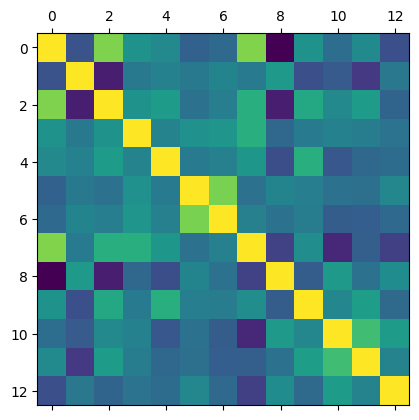

In [4]:
# vẽ biểu đồ ma trận tương quan cho bộ dữ liệu
plt.matshow(df.corr())

Chúng ta sẽ bỏ đi cột Id vì không mang lại cho chúng ta nhiều thông tin, nó chỉ đơn giản là đánh dấu sản phẩm mà thôi.

In [9]:
x = df.iloc[:, : -1]

In [10]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Chúng ta áp dụng phương pháp chuẩn hóa MinMaxScaler để tăng thêm hiệu quả cho mô hình. Hãy tìm hiểu thêm cơ chế của MinMaxScler!

In [11]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(x)

# 3. Training model

In [17]:
kmean_model = KMeans(n_clusters=10, max_iter=300, random_state=42)
kmean_model.fit(df_scaled)

KMeans(n_clusters=2, random_state=42)

# 4. Evaluate model

# 5. So sánh tìm ra K tốt nhất cho mô hình

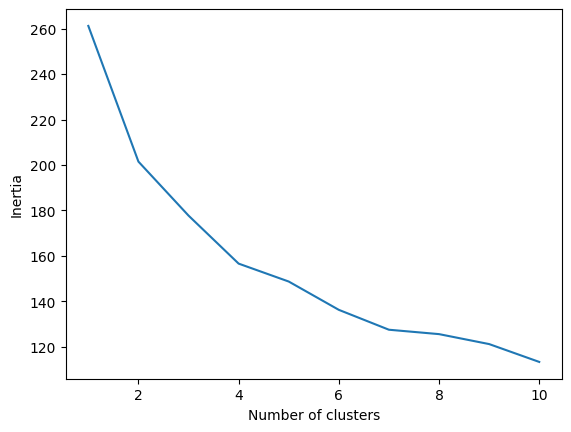

In [18]:
# Evaluate model!
# Silhouette score
from sklearn.metrics import silhouette_score

silhouette_score(df_scaled, kmean_model.labels_)
# silhouette_score = 0.25

# Elbow method
inertia = []

for i in range(1, 11):
    kmean_model = KMeans(n_clusters=i)
    kmean_model.fit(df_scaled)
    inertia.append(kmean_model.inertia_)
plt.plot(range(1, 11), inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()